## Loading and inspecting the meteorite landings data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Meteorite Landing - Meteorite-Landings.csv')

In [3]:
data.head()

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,"DateObject[{1951}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,"DateObject[{1952}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,"DateObject[{1976}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,"DateObject[{1902}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-33.16667, -64.95}]"


In [4]:
data.shape

(45716, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            45716 non-null  object
 1   ID              45716 non-null  int64 
 2   NameType        45716 non-null  object
 3   Classification  45716 non-null  object
 4   Mass            45716 non-null  object
 5   Fall            45716 non-null  object
 6   Year            45716 non-null  object
 7   Coordinates     45716 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB


## Extracting numeric values from strings to generate descriptive statistics.

In [6]:
data['Mass'] = data['Mass'].str.extract(r'\[(\d+)')[0].astype(float)
data['Year'] = data['Year'].str.extract(r'\{(\d{4})\}')[0].astype(float)
coords = data['Coordinates'].str.extract(r'\{(-?\d+\.?\d*),\s*(-?\d+\.?\d*)\}')
data[['lat', 'long']] = coords.astype(float)
data.drop(columns=['Coordinates'], inplace=True)
data_stats = data[['Mass', 'Year', 'lat', 'long']].describe()
print(data_stats)

               Mass          Year           lat          long
count  4.558500e+04  45422.000000  32187.000000  32187.000000
mean   1.327772e+04   1991.874928    -46.675559     72.854090
std    5.749889e+05     23.956664     47.049897     83.055587
min    0.000000e+00   1399.000000    -87.366670   -165.433330
25%    7.000000e+00   1987.000000    -79.683330     26.000000
50%    3.200000e+01   1998.000000    -72.000000     56.646250
75%    2.020000e+02   2003.000000     18.536165    159.386110
max    6.000000e+07   2013.000000     81.166670    178.200000


In [7]:
data.head()

,Name,ID,NameType,Classification,Mass,Fall,Year,lat,long
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45716 non-null  object 
 1   ID              45716 non-null  int64  
 2   NameType        45716 non-null  object 
 3   Classification  45716 non-null  object 
 4   Mass            45585 non-null  float64
 5   Fall            45716 non-null  object 
 6   Year            45422 non-null  float64
 7   lat             32187 non-null  float64
 8   long            32187 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [9]:
data.nunique()

,0
Name,45716
ID,45716
NameType,2
Classification,466
Mass,3512
Fall,2
Year,262
lat,12738
long,14639


### Checking for null values in dataset.

In [10]:
data.isnull().sum()

,0
Name,0
ID,0
NameType,0
Classification,0
Mass,131
Fall,0
Year,294
lat,13529
long,13529


In [11]:
data['Mass'].value_counts()

,count
Mass,
1.0,2307
0.0,1956
2.0,1763
3.0,1610
4.0,1356
...,...
59400.0,1
7188.0,1
2689.0,1


In [12]:
data['Year'].value_counts()

,count
Year,
2003.0,3323
1979.0,3046
1998.0,2697
2006.0,2456
1988.0,2296
...,...
1716.0,1
1724.0,1
1776.0,1


In [13]:
data['Year'].max()

2013.0

In [14]:
data['Year'].min()

1399.0

In [15]:
data['Mass'].min()

0.0

### Removing rows where mass is 0.0 g.

In [16]:
data = data[data['Mass'] != 0.0]

In [17]:
data['NameType'].value_counts()

,count
NameType,
Valid,43710
Relict,50


### Let's keep only valid meteor landings in our dataset.

In [18]:
data = data[data['NameType'] == 'Valid']

In [19]:
data['NameType'].value_counts()

,count
NameType,
Valid,43710


### Dropping rows with no mass, year data and giving default value of 0 to missing lat, lon values.

In [20]:
data.fillna({'lat':0, 'lon':0}, inplace = True)

In [21]:
data.dropna(inplace = True, axis = 0)

In [22]:
data['Year'] = data['Year'].astype(int)

In [23]:
data.shape

(30474, 9)

In [24]:
data.isnull().sum()

,0
Name,0
ID,0
NameType,0
Classification,0
Mass,0
Fall,0
Year,0
lat,0
long,0


In [25]:
data.duplicated().sum()

np.int64(0)

### Let's create a new column for mass in kg.

In [26]:
data['Mass_kg'] = data['Mass']/1000

In [27]:
data.reset_index(drop=True, inplace=True)

### Final dataset before analysis and visualization.

In [28]:
data.head()

,Name,ID,NameType,Classification,Mass,Fall,Year,lat,long,Mass_kg
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,0.021
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,0.720
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,107.000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,1.914
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,0.780


## Data analysis and insights

### 10 heaviest meteorites.

In [29]:
heaviest_meteorites = data.nlargest(10, 'Mass')
heaviest_meteorites

,Name,ID,NameType,Classification,Mass,Fall,Year,lat,long,Mass_kg
14159,Hope,11890,Valid,"Iron, IVB",60000000.0,Found,1920,-19.58333,17.91667,60000.0
5163,Catalina 011,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818,76.13333,-64.93333,58200.0
5156,Catalina 003,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575,-27.46667,-60.58333,50000.0
5160,Catalina 008,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891,35.05000,-111.03333,30000.0
3316,Asuka 8602,2335,Valid,"Iron, IIIE",28000000.0,Found,1898,47.00000,88.00000,28000.0
11290,Glorieta Mountain,10912,Valid,"Iron, IVA",26000000.0,Found,1836,-25.50000,18.00000,26000.0
5258,Colorado Springs,5363,Valid,"Iron, IIIAB",24300000.0,Found,1852,27.00000,-105.10000,24300.0
18984,Mundrabilla 005,16852,Valid,"Iron, IAB-ung",24000000.0,Found,1911,-30.78333,127.55000,24000.0
876,Sinai,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947,46.16000,134.65333,23000.0
4860,Bates Nunataks A78005,4919,Valid,"Iron, ungrouped",22000000.0,Found,1863,26.20000,-107.83333,22000.0


### Fell vs Found meteorites count

In [30]:
fall_count = data['Fall'].value_counts()
print(fall_count)

Fall
Found    29417
Fell      1057
Name: count, dtype: int64


### Average mass of top 5 most common classifications.

In [31]:
common_class = data['Classification'].value_counts().nlargest(5).index
print(common_class)

Index(['L6', 'H5', 'H4', 'H6', 'L5'], dtype='object', name='Classification')


In [32]:
common_class_data = data[data['Classification'].isin(common_class)]
avg_mass_by_class = common_class_data.groupby('Classification')['Mass'].mean()
print(avg_mass_by_class)

Classification
H4    1164.946041
H5    2664.302196
H6    1160.823320
L5    3023.956471
L6    1790.237506
Name: Mass, dtype: float64


### Grouping data by decade to discover trends.

In [33]:
data['decade'] = (data['Year'] // 10) * 10
decade_data_count = data['decade'].value_counts().sort_index()
print(decade_data_count)

decade
1390       1
1490       2
1570       1
1580       1
1600       1
1620       3
1630       2
1660       1
1670       1
1680       1
1710       2
1720       2
1740       3
1750       3
1760       3
1770       3
1780       5
1790      11
1800      21
1810      28
1820      28
1830      33
1840      47
1850      71
1860      95
1870      88
1880     121
1890     124
1900     136
1910     150
1920     156
1930     298
1940     188
1950     201
1960     374
1970    4620
1980    6629
1990    8807
2000    7411
2010     802
Name: count, dtype: int64


In [34]:
data.head()

,Name,ID,NameType,Classification,Mass,Fall,Year,lat,long,Mass_kg,decade
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,0.021,1880
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,0.720,1950
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,107.000,1950
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,1.914,1970
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,0.780,1900


### Find mean, median, std, sum and max mass of meteorites.

In [35]:
mass_arr = data['Mass_kg'].to_numpy()
print(mass_arr)

[2.100e-02 7.200e-01 1.070e+02 ... 3.000e-03 2.167e+00 2.000e-01]


In [36]:
mean_mass = np.mean(mass_arr)
median_mass = np.median(mass_arr)
std_mass = np.std(mass_arr)
sum_mass = np.sum(mass_arr)
max_mass = np.max(mass_arr)
print(f"Mean mass: {mean_mass:.2f} kgs")
print(f"Median mass: {median_mass:.2f} kgs")
print(f"Standard deviation of mass: {std_mass:.2f} kgs")
print(f"Total mass of all meteorites: {sum_mass:.2f} kgs")
print(f"Maximum mass: {max_mass:.2f} kgs")

Mean mass: 19.43 kgs
Median mass: 0.03 kgs
Standard deviation of mass: 703.03 kgs
Total mass of all meteorites: 592043.68 kgs
Maximum mass: 60000.00 kgs


## Visualization of data.

In [37]:
yearly_count = data['Year'].value_counts().sort_index()

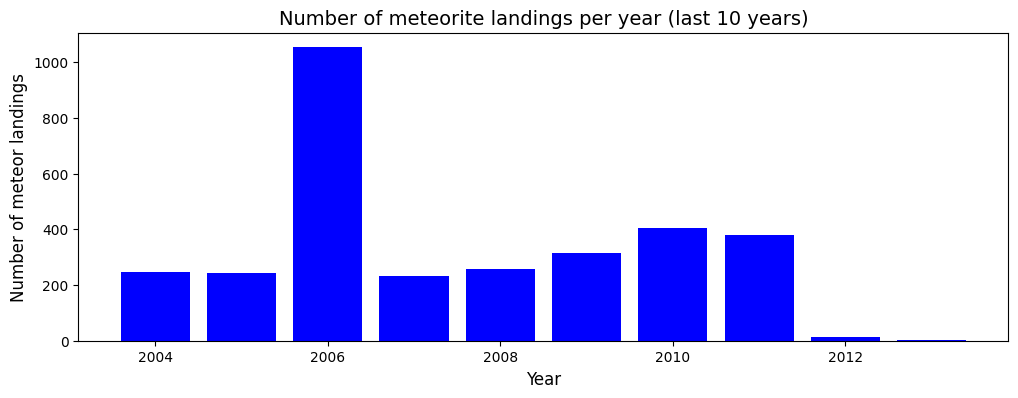

In [38]:
plt.figure(figsize=(12, 4))
plt.bar(yearly_count.tail(10).index, yearly_count.tail(10).values, color='blue')
plt.title('Number of meteorite landings per year (last 10 years)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of meteor landings', fontsize=12)
plt.show()

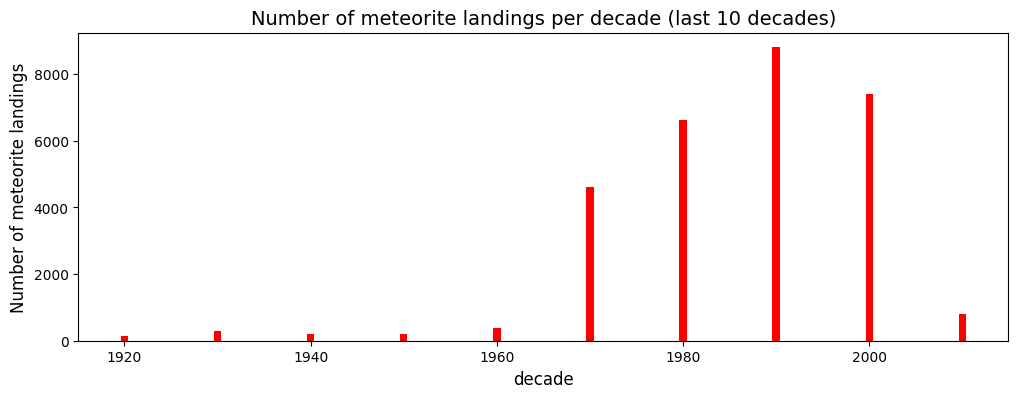

In [39]:
plt.figure(figsize=(12, 4))
plt.bar(decade_data_count.tail(10).index, decade_data_count.tail(10).values, color='red')
plt.title('Number of meteorite landings per decade (last 10 decades)', fontsize=14)
plt.xlabel('decade', fontsize=12)
plt.ylabel('Number of meteorite landings', fontsize=12)
plt.show()

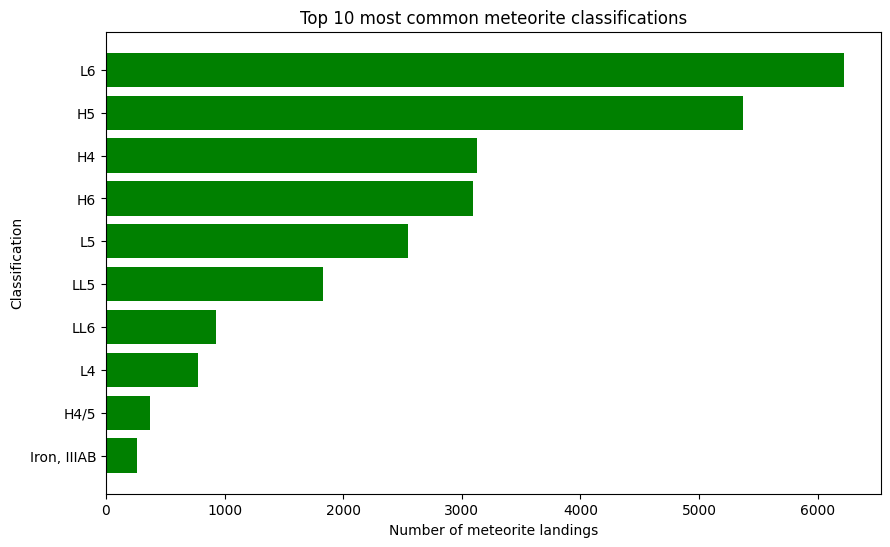

In [40]:
classification_counts = data['Classification'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
plt.barh(classification_counts.index, classification_counts.values, color='green')
plt.xlabel('Number of meteorite landings')
plt.ylabel('Classification')
plt.title('Top 10 most common meteorite classifications')
plt.gca().invert_yaxis()
plt.show()

<Axes: xlabel='Year', ylabel='Mass'>

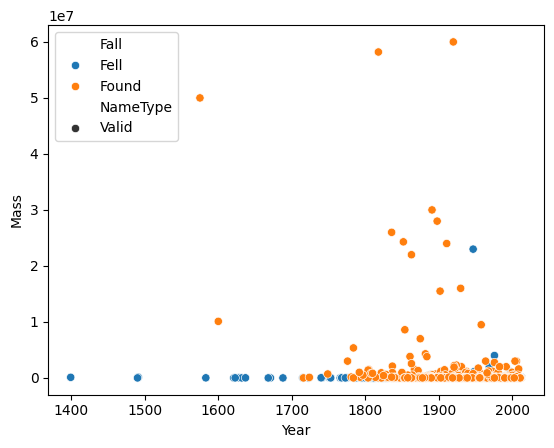

In [41]:
sns.scatterplot(x='Year', y='Mass', data=data,hue=data['Fall'],style=data['NameType'])

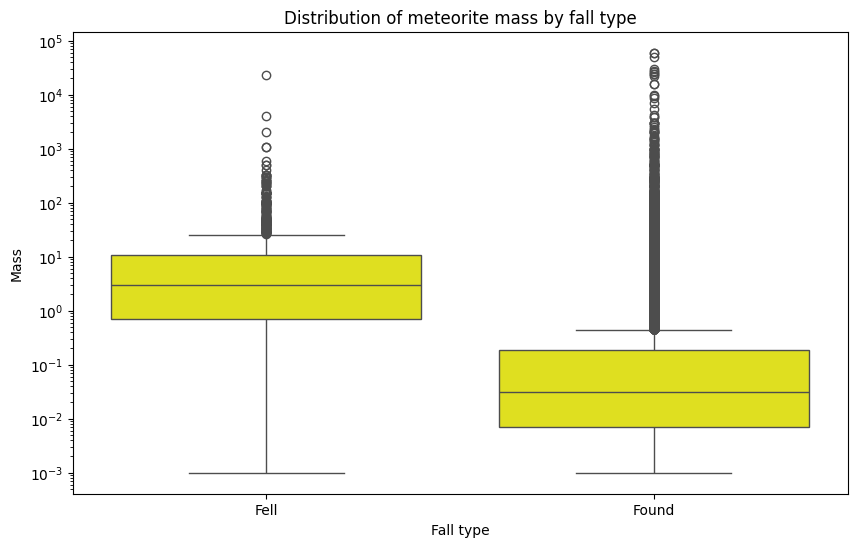

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fall', y='Mass_kg', data=data, color='yellow')
plt.title('Distribution of meteorite mass by fall type')
plt.xlabel('Fall type')
plt.ylabel('Mass')
plt.yscale('log')
plt.show()

## Conclusion:

* **Heaviest Meteorites:** The analysis identified the 10 heaviest meteorites in the dataset with the Hope meteorite having the largest mass.
* **Fell vs Found:** The majority of meteorite landings in the dataset are categorized as Found rather than Fell.
* **Top Common Classifications:** The top 5 most common meteorite classifications are L6, H5, H4, H6, and L5.
* **Landing Trends:** The number of meteorite landings per decade shows an increase in recent decades with a peak in the 1990.
* **Mass Distribution by Fall Type:** The distribution of mass differs significantly between Fell and Found meteorites with Found meteorites generally having a wider range of masses and the heaviest one.